<a href="https://colab.research.google.com/github/imsurgeon/agro-ds/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F%20%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D1%80%D0%B0%D1%81%D1%82%D0%B0%D1%8E%D1%89%D0%B5%D0%B9%20%D1%81%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%BE%D1%85%D0%BE%D0%B7%D1%8F%D0%B9%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9%20%D0%BA%D1%83%D0%BB%D1%8C%D1%82%D1%83%D1%80%D1%8B/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC 

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/agro/train.csv')

In [ ]:
data.head(4)

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15,Day 16,Day 17,Day 18,Day 19,Day 20,Day 21,Day 22,Day 23,Day 24,Day 25,Day 26,Day 27,Day 28,Day 29,Day 30,Day 31,Day 32,Day 33,Day 34,Day 35,Day 36,Day 37,...,Day 328,Day 329,Day 330,Day 331,Day 332,Day 333,Day 334,Day 335,Day 336,Day 337,Day 338,Day 339,Day 340,Day 341,Day 342,Day 343,Day 344,Day 345,Day 346,Day 347,Day 348,Day 349,Day 350,Day 351,Day 352,Day 353,Day 354,Day 355,Day 356,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366,Culture
0,2018,517,48.64,0.5369,0.5371,0.5375,0.5379,0.5384,0.5390,0.5397,0.5405,0.5414,0.5425,0.5437,0.5450,0.5466,0.5487,0.5511,0.5539,0.5571,0.5605,0.5641,0.5679,0.5718,0.5759,0.5800,0.5842,0.5883,0.5924,0.5964,0.6003,0.6040,0.6074,0.6106,0.6135,0.6161,0.6182,0.6200,0.6214,0.6227,...,0.3700,0.3739,0.3786,0.3838,0.3896,0.3959,0.4024,0.4092,0.4162,0.4232,0.4301,0.4369,0.4435,0.4497,0.4555,0.4608,0.4655,0.4694,0.4726,0.4748,0.4760,0.4720,0.468,0.4641,0.4601,0.4561,0.4521,0.4481,0.4442,0.4402,0.4362,0.4322,0.4283,0.4243,0.4203,0.4163,0.4123,0.4084,NaN,4
1,2019,1395,80.41,0.1159,0.1096,0.1034,0.0971,0.0909,0.0846,0.0783,0.0721,0.0658,0.0596,0.0533,0.0471,0.0408,0.0345,0.0283,0.0220,0.0158,0.0095,0.0033,-0.0030,-0.0040,-0.0043,-0.0044,-0.0046,-0.0050,-0.0054,-0.0058,-0.0062,-0.0066,-0.0070,-0.0074,-0.0078,-0.0082,-0.0086,-0.0090,-0.0094,-0.0098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2,2017,44,43.64,-0.0204,-0.0207,-0.0210,-0.0212,-0.0215,-0.0218,-0.0220,-0.0222,-0.0224,-0.0226,-0.0228,-0.0230,-0.0232,-0.0234,-0.0235,-0.0236,-0.0238,-0.0239,-0.0240,-0.0241,-0.0242,-0.0243,-0.0244,-0.0245,-0.0246,-0.0247,-0.0248,-0.0249,-0.0250,-0.0251,-0.0252,-0.0253,-0.0254,-0.0255,-0.0256,-0.0257,-0.0258,...,0.1753,0.1306,0.0858,0.0410,0.0402,0.0393,0.0385,0.0376,0.0368,0.0360,0.0351,0.0343,0.0334,0.0326,0.0318,0.0309,0.0301,0.0292,0.0284,0.0276,0.0267,0.0259,0.025,0.0242,0.0234,0.0225,0.0217,0.0208,0.0200,0.0516,0.0833,0.1149,0.1466,0.1782,0.2099,0.2415,0.2732,0.3048,NaN,2
3,2018,1591,79.34,0.4827,0.4576,0.4324,0.4073,0.3821,0.3570,0.3318,0.3067,0.2815,0.2637,0.2509,0.2356,0.2203,0.2051,0.1898,0.1745,0.1592,0.1439,0.1286,0.1133,0.0980,0.0827,0.0674,0.0522,0.0369,0.0216,0.0063,-0.0090,0.0427,0.0943,0.1460,0.1976,0.2493,0.3009,0.3526,0.4042,0.4559,...,0.2565,0.2565,0.2566,0.2566,0.2567,0.2567,0.2568,0.2568,0.2569,0.2570,0.2570,0.2571,0.2572,0.2573,0.2574,0.2575,0.2576,0.2577,0.2579,0.2580,0.2582,0.2585,0.259,0.2595,0.2602,0.2609,0.2617,0.2626,0.2636,0.2646,0.2657,0.2668,0.2680,0.2692,0.2705,0.2717,0.2730,0.2743,NaN,4


In [ ]:
data.isna()

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15,Day 16,Day 17,Day 18,Day 19,Day 20,Day 21,Day 22,Day 23,Day 24,Day 25,Day 26,Day 27,Day 28,Day 29,Day 30,Day 31,Day 32,Day 33,Day 34,Day 35,Day 36,Day 37,...,Day 328,Day 329,Day 330,Day 331,Day 332,Day 333,Day 334,Day 335,Day 336,Day 337,Day 338,Day 339,Day 340,Day 341,Day 342,Day 343,Day 344,Day 345,Day 346,Day 347,Day 348,Day 349,Day 350,Day 351,Day 352,Day 353,Day 354,Day 355,Day 356,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366,Culture
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
2834,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [ ]:
data = data.sort_values(['Field ID', 'Year', 'Culture'])

In [ ]:
data.head(20)

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15,Day 16,Day 17,Day 18,Day 19,Day 20,Day 21,Day 22,Day 23,Day 24,Day 25,Day 26,Day 27,Day 28,Day 29,Day 30,Day 31,Day 32,Day 33,Day 34,Day 35,Day 36,Day 37,...,Day 328,Day 329,Day 330,Day 331,Day 332,Day 333,Day 334,Day 335,Day 336,Day 337,Day 338,Day 339,Day 340,Day 341,Day 342,Day 343,Day 344,Day 345,Day 346,Day 347,Day 348,Day 349,Day 350,Day 351,Day 352,Day 353,Day 354,Day 355,Day 356,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366,Culture
20,2015,1,211.54,-0.0384,-0.0400,-0.0414,-0.0427,-0.0439,-0.0449,-0.0458,-0.0466,-0.0472,-0.0477,-0.0480,-0.0483,-0.0487,-0.0492,-0.0496,-0.0501,-0.0504,-0.0507,-0.0509,-0.0508,-0.0506,-0.0502,-0.0495,-0.0486,-0.0478,-0.0469,-0.0460,-0.0450,-0.0441,-0.0432,-0.0422,-0.0413,-0.0404,-0.0394,-0.0385,-0.0376,-0.0367,...,0.1708,0.1702,0.1696,0.1690,0.1684,0.1679,0.1675,0.1671,0.1667,0.1663,0.1659,0.1655,0.1651,0.1646,0.1641,0.1635,0.1569,0.1504,0.1438,0.1372,0.1306,0.1241,0.1175,0.1109,0.1043,0.0978,0.0912,0.0846,0.0780,0.0715,0.0649,0.0583,0.0517,0.0452,0.0386,0.0320,0.0254,0.0189,NaN,1
522,2016,1,211.54,0.0028,-0.0027,-0.0074,-0.0112,-0.0140,-0.0162,-0.0181,-0.0198,-0.0214,-0.0227,-0.0239,-0.0249,-0.0257,-0.0264,-0.0269,-0.0273,-0.0275,-0.0276,-0.0276,-0.0275,-0.0272,-0.0269,-0.0265,-0.0260,-0.0254,-0.0246,-0.0236,-0.0225,-0.0212,-0.0198,-0.0182,-0.0165,-0.0147,-0.0128,-0.0107,-0.0085,-0.0063,...,0.3481,0.3396,0.3311,0.3225,0.3140,0.3055,0.2970,0.2802,0.2628,0.2449,0.2268,0.2084,0.1900,0.1715,0.1531,0.1350,0.1170,0.0990,0.0810,0.0630,0.0450,0.0270,0.0090,-0.0090,-0.0096,-0.0101,-0.0107,-0.0112,-0.0118,-0.0124,-0.0129,-0.0135,-0.0140,-0.0146,-0.0151,-0.0157,-0.0163,-0.0168,-0.0174,5
2121,2017,1,211.54,-0.0284,-0.0288,-0.0292,-0.0294,-0.0297,-0.0298,-0.0299,-0.0300,-0.0300,-0.0299,-0.0299,-0.0297,-0.0296,-0.0294,-0.0291,-0.0289,-0.0286,-0.0283,-0.0280,-0.0276,-0.0272,-0.0267,-0.0261,-0.0256,-0.0251,-0.0246,-0.0243,-0.0240,-0.0239,-0.0240,-0.0243,-0.0246,-0.0251,-0.0257,-0.0264,-0.0270,-0.0277,...,0.0838,0.0645,0.0452,0.0260,0.0253,0.0246,0.0238,0.0231,0.0224,0.0217,0.0210,0.0202,0.0195,0.0188,0.0181,0.0174,0.0166,0.0159,0.0152,0.0145,0.0138,0.0130,0.0123,0.0116,0.0109,0.0102,0.0094,0.0087,0.0080,0.0216,0.0353,0.0489,0.0626,0.0762,0.0899,0.1035,0.1172,0.1308,NaN,4
1231,2018,1,211.54,0.1445,0.1581,0.1718,0.1854,0.1991,0.2127,0.2264,0.2400,0.2261,0.2122,0.1983,0.1844,0.1706,0.1567,0.1428,0.1289,0.1150,0.1011,0.0872,0.0733,0.0594,0.0456,0.0317,0.0178,0.0039,-0.0100,-0.0105,-0.0106,-0.0109,-0.0113,-0.0116,-0.0119,-0.0122,-0.0125,-0.0128,-0.0131,-0.0134,...,0.1565,0.1463,0.1379,0.1320,0.1274,0.1228,0.1182,0.1136,0.1090,0.1044,0.0998,0.0952,0.0905,0.0859,0.0813,0.0767,0.0721,0.0675,0.0629,0.0583,0.0537,0.0491,0.0445,0.0399,0.0353,0.0307,0.0261,0.0215,0.0168,0.0122,0.0076,0.0030,-0.0016,-0.0062,-0.0108,-0.0154,-0.0200,-0.0243,NaN,3
1304,2015,2,74.96,-0.0319,-0.0346,-0.0372,-0.0399,-0.0425,-0.0452,-0.0479,-0.0505,-0.0532,-0.0558,-0.0585,-0.0606,-0.0618,-0.0622,-0.0619,-0.0610,-0.0596,-0.0580,-0.0561,-0.0542,-0.0524,-0.0508,-0.0495,-0.0484,-0.0472,-0.0461,-0.0448,-0.0436,-0.0424,-0.0411,-0.0399,-0.0386,-0.0374,-0.0362,-0.0351,-0.0340,-0.0329,...,0.1703,0.1688,0.1674,0.1660,0.1651,0.1650,0.1655,0.1665,0.1678,0.1693,0.1709,0.1724,0.1738,0.1747,0.1752,0.1750,0.1387,0.1024,0.0661,0.0299,-0.0064,-0.0427,-0.0790,-0.0551,-0.0312,-0.0072,0.0167,0.0406,0.0645,0.0884,0.1123,0.1362,0.1602,0.1841,0.2080,0.1819,0.1557,0.1296,NaN,1
1789,2016,2,74.96,0.1035,0.0774,0.0513,0.0251,-0.0010,-0.0026,-0.0042,-0.0057,-0.0073,-0.0089,-0.0105,-0.0121,-0.0136,-0.0152,-0.0168,-0.0184,-0.0199,-0.0215,-0.0231,-0.0247,-0.0263,-0.0278,-0.0294,-0.0310,-0.0324,-0.0333,-0.0338,-0.0340,-0.0338,-0.0332,-0.0324,-0.0312,-0.0298,-0.0281,-0.0261,-0.0240,-0.0217,...,0.4746,0.4696,0.4645,0.4593,0.4540,0.4486,0.4430,0.4097,0.3764,0.3431,0.3099,0.2766,0.2433,0.2100,0.1767,0.1434,0.1101,0.0769,0.04

(array([ 653., 1365.,  470.,  159.,   89.,   54.,   15.,   10.,   11.,
          12.]),
 array([  5.99 ,  61.464, 116.938, 172.412, 227.886, 283.36 , 338.834,
        394.308, 449.782, 505.256, 560.73 ]),
 <a list of 10 Patch objects>)

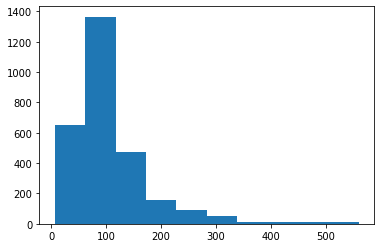

In [ ]:
plt.hist(data['Field Area'])

In [ ]:
data['Day 366'].replace(np.nan, -1)

20     -1.0000
522    -0.0174
2121   -1.0000
1231   -1.0000
1304   -1.0000
         ...  
1335   -1.0000
1933   -1.0000
844    -1.0000
2616   -1.0000
847    -1.0000
Name: Day 366, Length: 2838, dtype: float64

In [ ]:
data.replace(np.nan, -1)

,Year,Field ID,Field Area,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15,Day 16,Day 17,Day 18,Day 19,Day 20,Day 21,Day 22,Day 23,Day 24,Day 25,Day 26,Day 27,Day 28,Day 29,Day 30,Day 31,Day 32,Day 33,Day 34,Day 35,Day 36,Day 37,...,Day 328,Day 329,Day 330,Day 331,Day 332,Day 333,Day 334,Day 335,Day 336,Day 337,Day 338,Day 339,Day 340,Day 341,Day 342,Day 343,Day 344,Day 345,Day 346,Day 347,Day 348,Day 349,Day 350,Day 351,Day 352,Day 353,Day 354,Day 355,Day 356,Day 357,Day 358,Day 359,Day 360,Day 361,Day 362,Day 363,Day 364,Day 365,Day 366,Culture
20,2015,1,211.54,-0.0384,-0.0400,-0.0414,-0.0427,-0.0439,-0.0449,-0.0458,-0.0466,-0.0472,-0.0477,-0.0480,-0.0483,-0.0487,-0.0492,-0.0496,-0.0501,-0.0504,-0.0507,-0.0509,-0.0508,-0.0506,-0.0502,-0.0495,-0.0486,-0.0478,-0.0469,-0.0460,-0.0450,-0.0441,-0.0432,-0.0422,-0.0413,-0.0404,-0.0394,-0.0385,-0.0376,-0.0367,...,0.1708,0.1702,0.1696,0.1690,0.1684,0.1679,0.1675,0.1671,0.1667,0.1663,0.1659,0.1655,0.1651,0.1646,0.1641,0.1635,0.1569,0.1504,0.1438,0.1372,0.1306,0.1241,0.1175,0.1109,0.1043,0.0978,0.0912,0.0846,0.0780,0.0715,0.0649,0.0583,0.0517,0.0452,0.0386,0.0320,0.0254,0.0189,-1.0000,1
522,2016,1,211.54,0.0028,-0.0027,-0.0074,-0.0112,-0.0140,-0.0162,-0.0181,-0.0198,-0.0214,-0.0227,-0.0239,-0.0249,-0.0257,-0.0264,-0.0269,-0.0273,-0.0275,-0.0276,-0.0276,-0.0275,-0.0272,-0.0269,-0.0265,-0.0260,-0.0254,-0.0246,-0.0236,-0.0225,-0.0212,-0.0198,-0.0182,-0.0165,-0.0147,-0.0128,-0.0107,-0.0085,-0.0063,...,0.3481,0.3396,0.3311,0.3225,0.3140,0.3055,0.2970,0.2802,0.2628,0.2449,0.2268,0.2084,0.1900,0.1715,0.1531,0.1350,0.1170,0.0990,0.0810,0.0630,0.0450,0.0270,0.0090,-0.0090,-0.0096,-0.0101,-0.0107,-0.0112,-0.0118,-0.0124,-0.0129,-0.0135,-0.0140,-0.0146,-0.0151,-0.0157,-0.0163,-0.0168,-0.0174,5
2121,2017,1,211.54,-0.0284,-0.0288,-0.0292,-0.0294,-0.0297,-0.0298,-0.0299,-0.0300,-0.0300,-0.0299,-0.0299,-0.0297,-0.0296,-0.0294,-0.0291,-0.0289,-0.0286,-0.0283,-0.0280,-0.0276,-0.0272,-0.0267,-0.0261,-0.0256,-0.0251,-0.0246,-0.0243,-0.0240,-0.0239,-0.0240,-0.0243,-0.0246,-0.0251,-0.0257,-0.0264,-0.0270,-0.0277,...,0.0838,0.0645,0.0452,0.0260,0.0253,0.0246,0.0238,0.0231,0.0224,0.0217,0.0210,0.0202,0.0195,0.0188,0.0181,0.0174,0.0166,0.0159,0.0152,0.0145,0.0138,0.0130,0.0123,0.0116,0.0109,0.0102,0.0094,0.0087,0.0080,0.0216,0.0353,0.0489,0.0626,0.0762,0.0899,0.1035,0.1172,0.1308,-1.0000,4
1231,2018,1,211.54,0.1445,0.1581,0.1718,0.1854,0.1991,0.2127,0.2264,0.2400,0.2261,0.2122,0.1983,0.1844,0.1706,0.1567,0.1428,0.1289,0.1150,0.1011,0.0872,0.0733,0.0594,0.0456,0.0317,0.0178,0.0039,-0.0100,-0.0105,-0.0106,-0.0109,-0.0113,-0.0116,-0.0119,-0.0122,-0.0125,-0.0128,-0.0131,-0.0134,...,0.1565,0.1463,0.1379,0.1320,0.1274,0.1228,0.1182,0.1136,0.1090,0.1044,0.0998,0.0952,0.0905,0.0859,0.0813,0.0767,0.0721,0.0675,0.0629,0.0583,0.0537,0.0491,0.0445,0.0399,0.0353,0.0307,0.0261,0.0215,0.0168,0.0122,0.0076,0.0030,-0.0016,-0.0062,-0.0108,-0.0154,-0.0200,-0.0243,-1.0000,3
1304,2015,2,74.96,-0.0319,-0.0346,-0.0372,-0.0399,-0.0425,-0.0452,-0.0479,-0.0505,-0.0532,-0.0558,-0.0585,-0.0606,-0.0618,-0.0622,-0.0619,-0.0610,-0.0596,-0.0580,-0.0561,-0.0542,-0.0524,-0.0508,-0.0495,-0.0484,-0.0472,-0.0461,-0.0448,-0.0436,-0.0424,-0.0411,-0.0399,-0.0386,-0.0374,-0.0362,-0.0351,-0.0340,-0.0329,...,0.1703,0.1688,0.1674,0.1660,0.1651,0.1650,0.1655,0.1665,0.1678,0.1693,0.1709,0.1724,0.1738,0.1747,0.1752,0.1750,0.1387,0.1024,0.0661,0.0299,-0.0064,-0.0427,-0.0790,-0.0551,-0.0312,-0.0072,0.0167,0.0406,0.0645,0.0884,0.1123,0.1362,0.1602,0.1841,0.2080,0.1819,0.1557,0.1296,-1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,2019,1888,104.04,0.1105,0.1011,0.0917,0.0824,0.0730,0.0636,0.0542,0.0449,0.0355,0.0261,0.0167,0

In [ ]:
cat_cols = [
    'Year',
    'Field ID'
]

num_cols = [
    'Field Area'
]

for c in data:
  if c.startswith('Day'):
    num_cols.append(c)

feature_cols = num_cols + cat_cols
target_col = 'Culture'

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

parameters = {'classifier__C':[100, 10, 1, 0.1, 0.01, 0.001]}

clf = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial'))])

features = ['']

X_train, X_test, y_train, y_test = train_test_split(data[feature_cols] , data[target_col], random_state=0)

scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'weighted')
model = GridSearchCV(clf, parameters, scoring=scorer)

model.fit(X_train, y_train)
model.score(X_test, y_test)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

0.8222990240844305

In [ ]:
model = model

In [ ]:
test = pd.read_csv('/content/gdrive/My Drive/agro/test.csv')
test['Day 366'] = test['Day 366'].replace(' ', -1)

submission = pd.read_csv('/content/gdrive/My Drive/agro/example_csv_agrocode-task1.csv')
submission['Culture'] = model.predict(test)
submission.to_csv('/content/gdrive/My Drive/agro/submission.csv', index=False)


/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
